# Decision Tree

# Classification

## Training a Decision Tree with Scikit-Learn Library

`$ conda create --name tree spyder jupyter seaborn scikit-learn graphviz python-graphviz`

In [2]:
from sklearn import tree

In [3]:
X = [[0, 0], [1, 2], [3, 3]]
y = [0, 1, 2]

In [4]:
clf = tree.DecisionTreeClassifier()

In [5]:
clf = clf.fit(X, y)

In [6]:
clf.predict([[2., 2.]])

array([1])

In [7]:
clf.predict_proba([[2., 2.]])

array([[0., 1., 0.]])

In [8]:
clf.predict([[0.4, 1.1]])

array([0])

In [9]:
clf.predict_proba([[0.4, 1.1]])

array([[1., 0., 0.]])

In [10]:
clf.predict_proba([[0., 0.2]])

array([[1., 0., 0.]])

In [11]:
clf.predict_proba([[2.5, 3]])

array([[0., 0., 1.]])

***

# Applying to Iris Dataset

In [12]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()

In [51]:
X = iris.data[:, 2:]

In [52]:
y = iris.target

In [53]:
clf = tree.DecisionTreeClassifier(random_state = 42)

In [54]:
clf = clf.fit(X, y)

In [55]:
from sklearn.tree import export_graphviz

In [56]:
export_graphviz(clf, 
               out_file="tree.dot",
               feature_names=iris.feature_names[2:],
               class_names=iris.target_names,
               rounded=True,
               filled=True)

Run command in the environment with GraphViz installed:

`$ dot -Tpng tree.dot -o tree.png`

<img src="tree.png" width='50%'>

***

# Graphviz

In [57]:
import graphviz

In [58]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=iris.feature_names[:2],
                                class_names=iris.target_names,
                                rounded=True,
                                filled=True)

In [59]:
graph = graphviz.Source(dot_data)

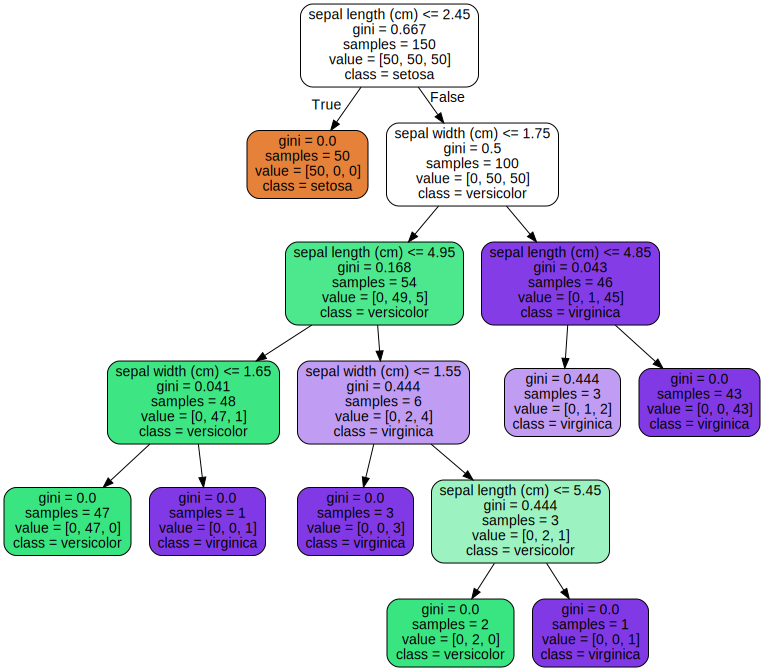

In [60]:
graph

***

## Visualise the Decision Boundary

In [61]:
import numpy as np
import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt

%matplotlib inline

In [62]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [63]:
col = ['petal_length', 'petal_width']
X = df.loc[:, col]

In [64]:
species_to_num = {'setosa': 0,
                 'versicolor': 1,
                 'virginica': 2}
df['tmp'] = df['species'].map(species_to_num)
y = df['tmp']

In [65]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)

In [66]:
Xv = X.values.reshape(-1, 1)
h = 0.02
x_min, x_max = Xv.min(), Xv.max() + 1
y_min, y_max = y.min(), y.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                    np.arange(y_min, y_max, h))

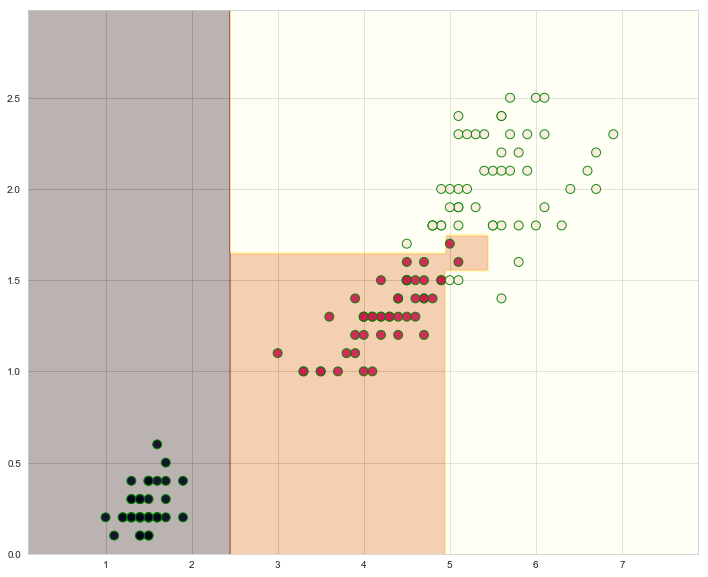

In [68]:
z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
fig = plt.figure(figsize=(12, 10))
ax = plt.contourf(xx, yy, z, cmap='afmhot', alpha=0.3)
plt.scatter(X.values[:, 0], X.values[:, 1], c=y, s=80, alpha=0.9, edgecolors='g')

***

## Gini vs Entropy

In [72]:
def gini(p):
    return(p) * (1-(p)) + (1-p) * (1-(1-p))

def entropy(p):
    return - p*np.log2(p) - (1-p) * np.log2((1-p))

def error(p):
    return 1 - np.max([p, 1-p])

In [73]:
x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]

sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x] 

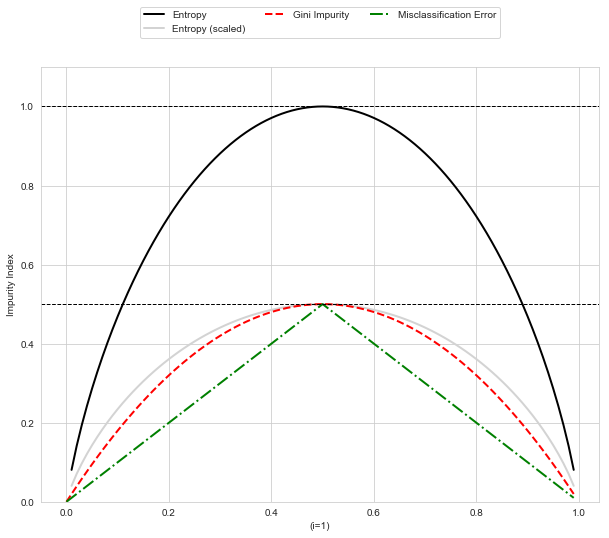

In [76]:
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111)
for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err],
                         ['Entropy', 'Entropy (scaled)', 
                         'Gini Impurity',
                         'Misclassification Error'],
                         ['-', '-', '--', '-.'],
                         ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
         ncol=3, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('(i=1)')
plt.ylabel('Impurity Index')
plt.show()

***

# Regression

In [77]:
from sklearn import tree

In [78]:
X = [[0, 0], [3, 3]]
y = [0.75, 3]

In [79]:
tree_reg = tree.DecisionTreeRegressor(random_state=42)

In [80]:
tree_reg = tree_reg.fit(X, y)

In [82]:
tree_reg.predict([[1.5, 1.5]])

array([0.75])

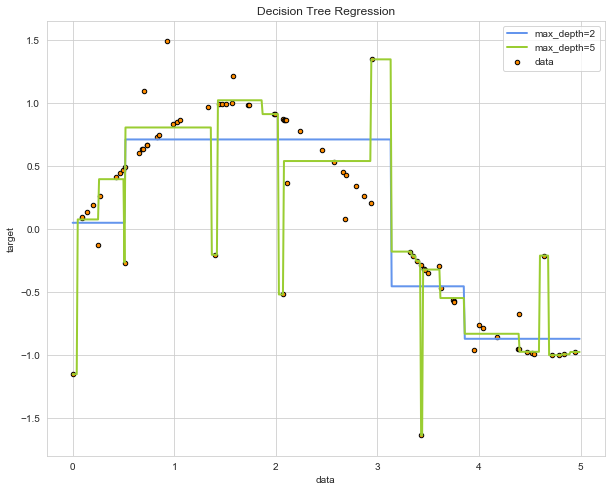

In [121]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure(figsize=(10,8))
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

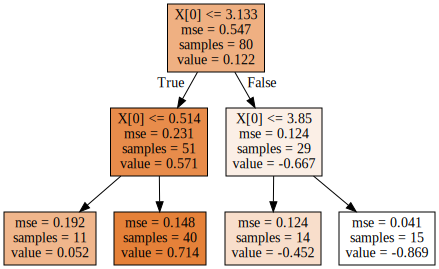

In [122]:
dot_data = tree.export_graphviz(regr_1, out_file=None, filled=True)

graph = graphviz.Source(dot_data)
graph

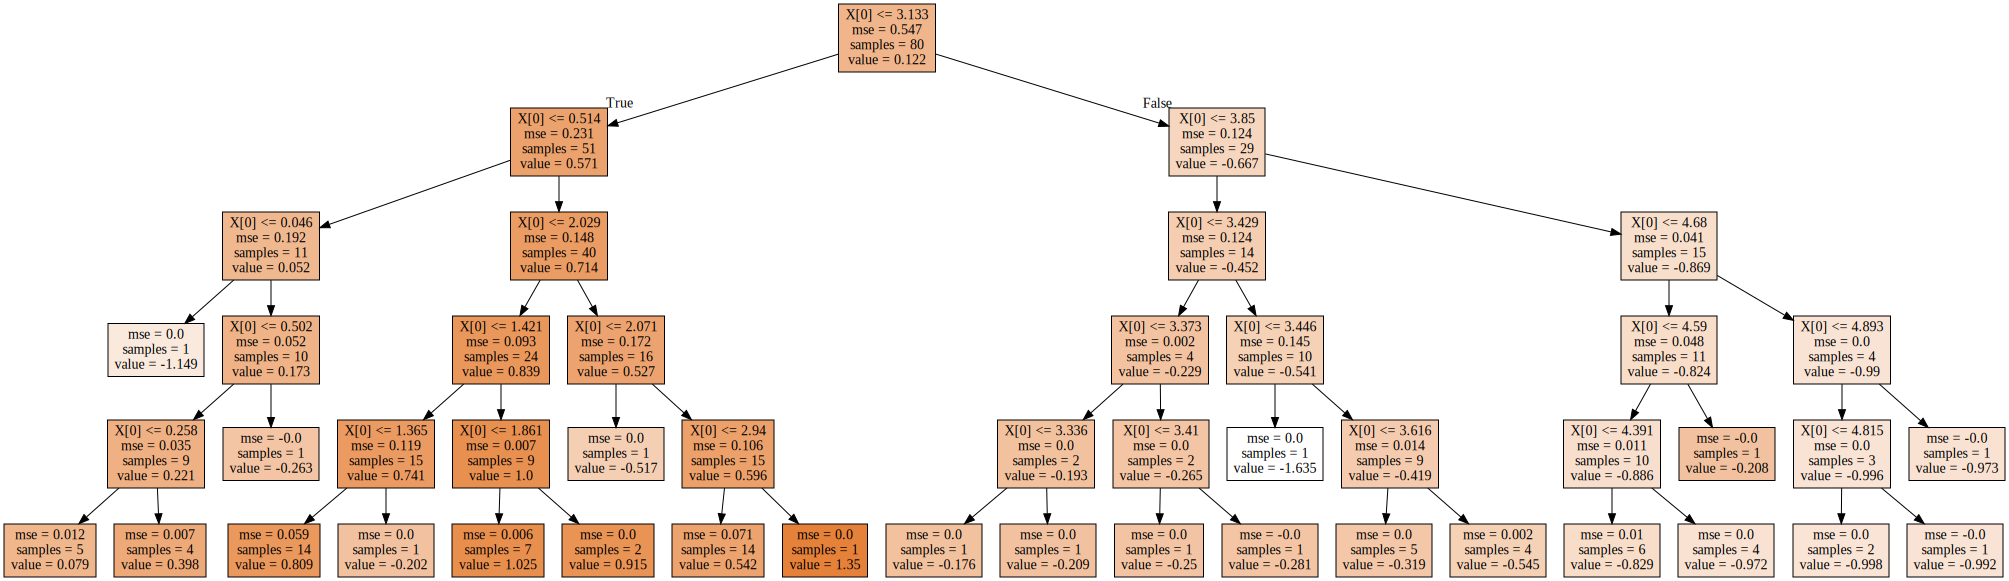

In [123]:
dot_data = tree.export_graphviz(regr_2, out_file=None, filled=True)
dot_data
graph = graphviz.Source(dot_data)
graph

## Regularization

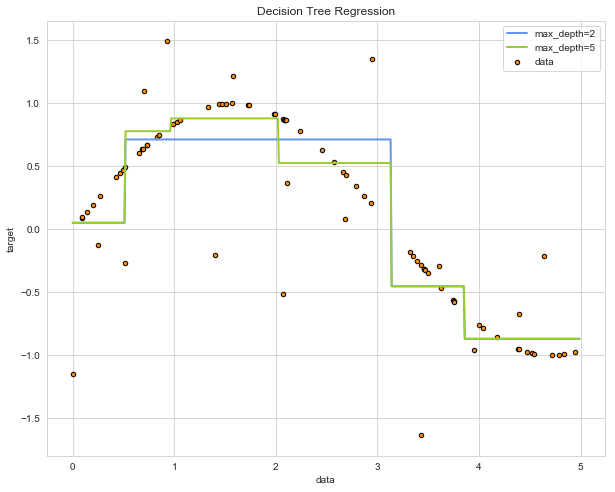

In [127]:
# Import the necessary modules and libraries
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 3 * (0.5 - rng.rand(16))

# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5, min_samples_leaf=10)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

# Plot the results
plt.figure(figsize=(10,8))
plt.scatter(X, y, s=20, edgecolor="black",
            c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",
         label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()

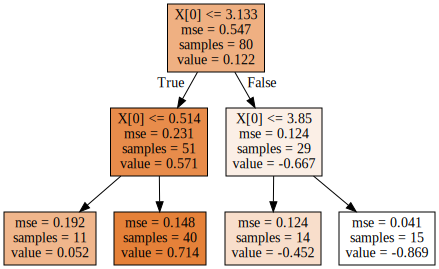

In [128]:
dot_data = tree.export_graphviz(regr_1, out_file=None, filled=True)

graph = graphviz.Source(dot_data)
graph

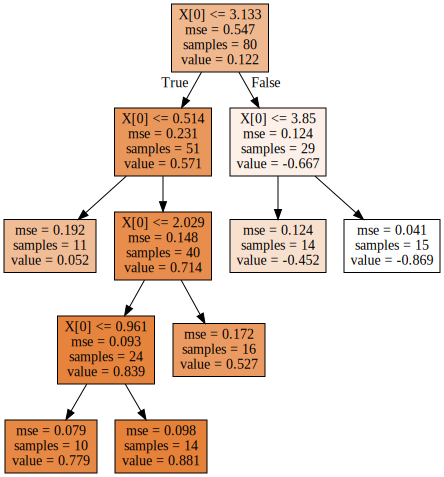

In [129]:
dot_data = tree.export_graphviz(regr_2, out_file=None, filled=True)

graph = graphviz.Source(dot_data)
graph

***

# Overfitting

In [130]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()

In [132]:
X = iris.data[:, 0:2]
y = iris.target
clf  = tree.DecisionTreeClassifier(random_state=42)
clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

In [133]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=iris.feature_names[:2],
                                class_names=iris.target_names,
                                rounded=True,
                                filled=True)

In [134]:
graph = graphviz.Source(dot_data)

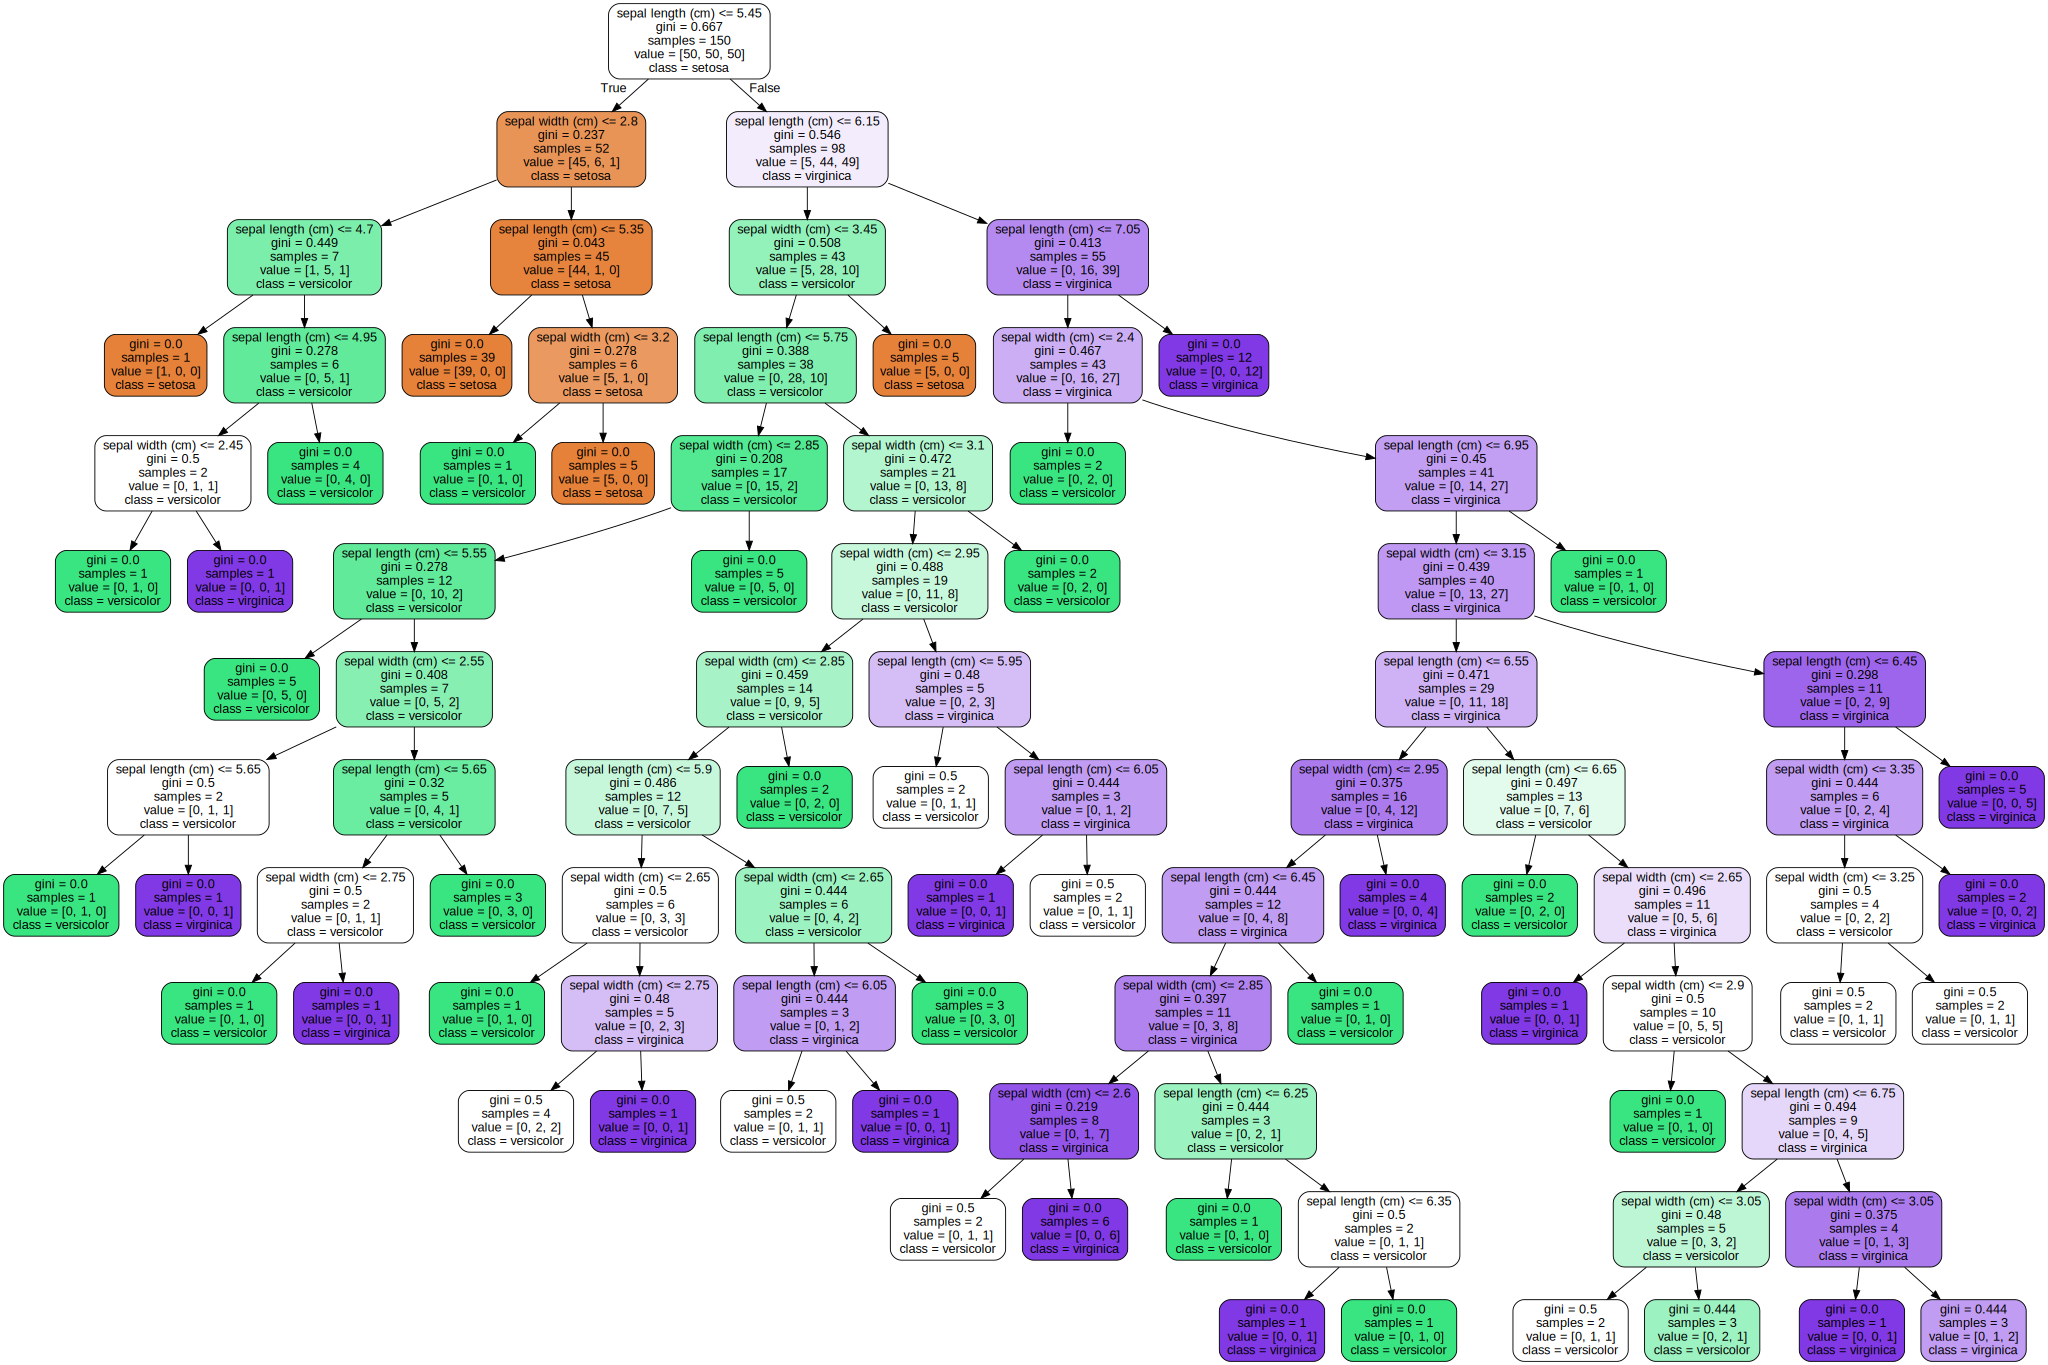

In [135]:
graph

***

# Modelling End-to-End with Decision Tree

In [136]:
from sklearn.datasets import make_moons

In [143]:
X_data, y_data = make_moons(n_samples=1000, noise=0.5, random_state=42)

In [158]:
cl1 = tree.DecisionTreeClassifier(random_state=42)
cl2 = tree.DecisionTreeClassifier(min_samples_leaf=10, random_state=42)

In [147]:
from sklearn.model_selection import train_test_split

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.1, random_state=42)

In [149]:
from sklearn.model_selection import GridSearchCV

In [168]:
params = {'max_leaf_nodes': list(range(2, 50)),
         'min_samples_split': [2, 3, 4],
         'max_depth': list(range(2, 50)),
         'min_samples_leaf': list(range(1, 20))}

In [169]:
grid_search_cv = GridSearchCV(tree.DecisionTreeClassifier(random_state=42), params, n_jobs=-1, verbose=1)

grid_search_cv.fit(X_train, y_train)

D:\Anaconda3\envs\tree\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 131328 candidates, totalling 393984 fits


[Parallel(n_jobs=-1)]: Done 492 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 8097 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 17847 tasks      | elapsed:   25.8s
[Parallel(n_jobs=-1)]: Done 31497 tasks      | elapsed:   39.0s
[Parallel(n_jobs=-1)]: Done 49047 tasks      | elapsed:   56.2s
[Parallel(n_jobs=-1)]: Done 70497 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 95847 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 125097 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 158247 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 222714 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 304614 tasks      | elapsed:  5.2min
[Parallel(n_jobs=-1)]: Done 393984 out of 393984 | elapsed:  7.0min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49], 'min_samples_split': [2, 3, 4], 'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13...7, 48, 49], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [170]:
grid_search_cv.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=4, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=19,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=42, splitter='best')

In [171]:
from sklearn.metrics import accuracy_score

In [173]:
y_pred = grid_search_cv.predict(X_test)
accuracy_score(y_test, y_pred)

0.82

In [174]:
cl1.fit(X_train, y_train)
y_pred = cl1.predict(X_test)
accuracy_score(y_test, y_pred)

0.74

In [175]:
cl2.fit(X_train, y_train)
y_pred = cl2.predict(X_test)
accuracy_score(y_test, y_pred)

0.84